In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import ipywidgets

dates = []
duration = []

plt.rcParams['figure.figsize'] = [20,10]
nasa = pd.read_csv("./Extra-vehicular_Activity__EVA__-_US_and_Russia.csv", sep=",", parse_dates=['Date'], header=0)
nasa

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
0,1.0,USA,Ed White,Gemini IV,1965-06-03,0:36,First U.S. EVA. Used HHMU and took photos. G...
1,2.0,USA,David Scott,Gemini VIII,NaT,0:00,HHMU EVA cancelled before starting by stuck on...
2,3.0,USA,Eugene Cernan,Gemini IX-A,1966-06-05,2:07,"Inadequate restraints, stiff 25ft umbilical an..."
3,4.0,USA,Mike Collins,Gemini X,1966-07-19,0:50,Standup EVA. UV photos of stars. Ended by ey...
4,5.0,USA,Mike Collins,Gemini X,1966-07-20,0:39,Retrieved MMOD experiment from docked Agena. ...
...,...,...,...,...,...,...,...
370,367.0,Russia,Gennady Padalka Yuri Malenchenko,ISS Incr-32,2012-08-20,5:51,1 hr late start due to airlock valve. Relocat...
371,368.0,Russia,Pavel Vinogradov Roman Romanenko,ISS Incr-35,2013-04-19,6:38,"Installed plasma experiment/cables/probes, rep..."
372,369.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,2013-06-24,6:34,Power cable clamps installed and Kurs tested i...
373,370.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,2013-08-16,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2..."


In [4]:
duration = list(nasa.Duration)
nasa.Date = nasa.Date.astype(str)
#Erotellaan kaikki tyhjät saman nimisiksi
nasa.Date = nasa.Date.apply(lambda x : None if x=='NaT' and x == None and x == 'None' and x == ' None' and x == 'None ' else x)
res = [i for i in nasa.Date if i] 
dates = list(nasa.Date)

In [5]:
nasa2 = str(nasa[nasa.Date.isnull()])
nasa2

'Empty DataFrame\nColumns: [EVA #, Country, Crew    , Vehicle, Date, Duration, Purpose ]\nIndex: []'

In [6]:
MissionDesc = nasa['Purpose '].tolist()
MissionDescDates = nasa['Date']
Missions = []
MissionDates = []
for i, j in zip(MissionDesc, MissionDescDates):
    MissionDates.append(j)
    Missions.append(i)
    
from collections import Counter   
c = Counter()
for f, b in zip(MissionDates, Missions):
        c.update({f, b}) 
#print(list(c.items()))  

In [7]:
dates
#dates_list = [datetime.datetime.strptime(date, '"%Y-%m-%d"').date() for date in MissionDescDates]
#dates_list

['1965-06-03',
 'NaT',
 '1966-06-05',
 '1966-07-19',
 '1966-07-20',
 '1966-09-13',
 '1966-09-14',
 '1966-11-12',
 '1966-11-13',
 '1966-11-14',
 '1969-03-06',
 '1969-03-06',
 '1969-07-20',
 '1969-07-20',
 '1969-11-19',
 '1969-11-20',
 '1969-11-20',
 '1971-02-05',
 '1971-02-06',
 '1971-02-06',
 '1971-07-30',
 '1971-07-31',
 '1971-08-01',
 '1971-08-02',
 '1971-08-02',
 '1971-08-05',
 '1972-04-21',
 '1972-04-22',
 '1972-04-23',
 '1972-04-23',
 '1972-04-25',
 '1972-12-11',
 '1972-12-12',
 '1972-12-13',
 '1972-12-13',
 '1972-12-17',
 '1973-05-25',
 '1973-05-25',
 '1973-06-07',
 '1973-06-19',
 '1973-08-06',
 '1973-08-24',
 '1973-09-22',
 '1973-11-22',
 '1973-12-25',
 '1973-12-29',
 '1974-02-03',
 '1982-11-14',
 '1983-04-07',
 '1984-02-07',
 '1984-02-09',
 '1984-04-08',
 '1984-04-11',
 '1984-10-11',
 '1984-11-12',
 '1984-11-14',
 '1985-04-16',
 '1985-08-31',
 '1985-09-01',
 '1985-11-29',
 '1985-12-01',
 '1990-04-24',
 '1991-04-07',
 '1991-04-08',
 '1992-05-10',
 '1992-05-11',
 '1992-05-13',
 '

In [8]:
nasaCountryAmount = nasa['Country'].value_counts()
nasaCountryAmount

USA       236
Russia    139
Name: Country, dtype: int64

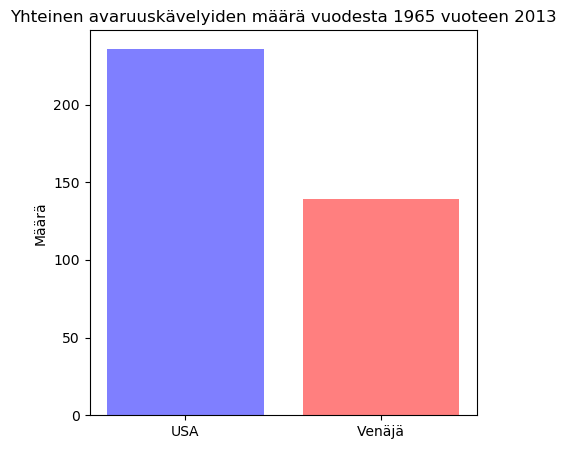

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['USA', 'Venäjä']
y_pos = np.arange(len(objects))
performance = nasaCountryAmount[0], nasaCountryAmount[1]

plt.subplots(figsize=(5, 5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color=["b","r"])
plt.xticks(y_pos, objects)
plt.ylabel('Määrä')
plt.title('Yhteinen avaruuskävelyiden määrä vuodesta 1965 vuoteen 2013')

plt.show()

In [10]:
#dates2 = str(nasa.Date)
years = []
months = []
days = []
YearMonth = []
dates2 = nasa.Date
dates2 = list(nasa.Date)
#dates2 = [i for i in dates2 if i is not "NaT"]

for i in dates2:
    if i != 'NaT':
        dates2 = datetime.strptime(i, "%Y-%m-%d")
        dates3 = '{:%Y-%m}'.format(datetime.strptime(i, '%Y-%m-%d'))
    years.append(dates2.year)
    months.append(dates2.month)
    days.append(dates2.day)
    YearMonth.append(dates3)
print("Years: \n", years,"\nMonths: \n", months,"\nDays: \n", days, "\n", YearMonth)
#dates2 = nasa.pivot("month", "Date", "Country")

Years: 
 [1965, 1965, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1974, 1982, 1983, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985, 1990, 1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1997, 1997, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2008, 2007, 2007, 2007, 

In [11]:
countries = list(nasa.Country)
cy = []
for i in zip(years, countries):
    cy.append(i)
print(cy)

[(1965, 'USA'), (1965, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1966, 'USA'), (1969, 'USA'), (1969, 'USA'), (1969, 'USA'), (1969, 'USA'), (1969, 'USA'), (1969, 'USA'), (1969, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1971, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1972, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1973, 'USA'), (1974, 'USA'), (1982, 'USA'), (1983, 'USA'), (1984, 'USA'), (1984, 'USA'), (1984, 'USA'), (1984, 'USA'), (1984, 'USA'), (1984, 'USA'), (1984, 'USA'), (1985, 'USA'), (1985, 'USA'), (1985, 'USA'), (1985, 'USA'), (1985, 'USA'), (1990, 'USA'), (1991, 'USA'), (1991, 'USA'), (1992, 'USA'), (1992, 'USA'), (1992, 'U

In [12]:
table = pd.DataFrame(columns=list('Y'))
table.Y = cy
tableCY = table['Y'].value_counts()
tableCY

(2009, USA)       22
(2007, USA)       20
(2002, USA)       19
(2008, USA)       16
(2001, USA)       13
                  ..
(1988, Russia)     1
(1982, USA)        1
(1994, Russia)     1
(1994, USA)        1
(1974, USA)        1
Name: Y, Length: 63, dtype: int64

In [13]:
countries = list(nasa.Country)
#for index, row in tableYears.iterrows():
#    (row["Y"], row["C"])
tableYears = pd.DataFrame(columns=list('YC'))
tableYears.Y = years
tableYears.C = countries
YearsAmount = tableYears['Y'].value_counts()
YearsAmount

2009    25
1995    24
2007    23
2002    23
2001    19
2008    19
1993    16
1984    15
2006    14
1991    13
1998    13
2010    12
2013    11
2000    10
1972    10
2011    10
1973    10
1990     9
1971     9
1992     9
1966     8
1997     8
1999     7
2005     7
1969     7
1996     7
2012     5
1987     5
1985     5
2004     5
1982     4
1986     2
1994     2
2003     2
1965     2
1978     1
1974     1
1979     1
1983     1
1988     1
Name: Y, dtype: int64

In [14]:
years2 = list(dict.fromkeys(years))
years2.sort()
for i in zip(years2, YearsAmount):
    print(i)

(1965, 25)
(1966, 24)
(1969, 23)
(1971, 23)
(1972, 19)
(1973, 19)
(1974, 16)
(1978, 15)
(1979, 14)
(1982, 13)
(1983, 13)
(1984, 12)
(1985, 11)
(1986, 10)
(1987, 10)
(1988, 10)
(1990, 10)
(1991, 9)
(1992, 9)
(1993, 9)
(1994, 8)
(1995, 8)
(1996, 7)
(1997, 7)
(1998, 7)
(1999, 7)
(2000, 5)
(2001, 5)
(2002, 5)
(2003, 5)
(2004, 4)
(2005, 2)
(2006, 2)
(2007, 2)
(2008, 2)
(2009, 1)
(2010, 1)
(2011, 1)
(2012, 1)
(2013, 1)


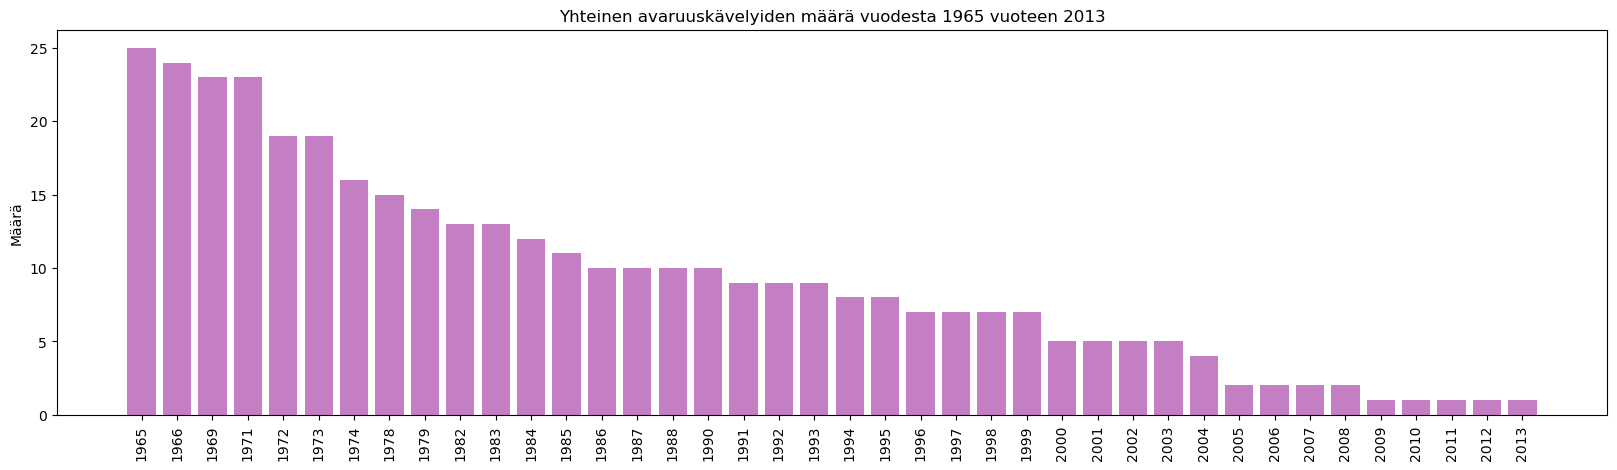

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = years2
y_pos = np.arange(len(objects))
performance = YearsAmount

plt.subplots(figsize=(20, 5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color="darkmagenta")
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Määrä')
plt.title('Yhteinen avaruuskävelyiden määrä vuodesta 1965 vuoteen 2013')

plt.show()

In [16]:
nasaVehicleAmount = nasa["Vehicle"].value_counts()
#nasaVehicleAmount.drop_duplicates(keep = "first", inplace = True)
nasaVehicleAmount

Soyuz TM-26      Mir 24     7
Apollo 15                   6
Soyuz T-10     Salyut 7     6
Soyuz TM-27     Mir 25      6
Soyuz TM-23     Mir 21      6
                           ..
ISS Incr-24                 1
Soyuz T-12      Salyut 7    1
STS-76                      1
Soyuz 4&5                   1
Soyuz TM-10    Mir          1
Name: Vehicle, Length: 151, dtype: int64

In [17]:
nasaVehicleNames = nasa["Vehicle"].dropna().unique().tolist()
#nasaVehicleNames = nasaVehicleNames.drop_duplicates(keep = "first", inplace = True)
vehicles = []
vehicleCount = []
for i in nasaVehicleNames:
    vehicles.append(i)
    vehicleCount.append(vehicles.count(i))

from collections import Counter

c = Counter()
for f, b in zip(vehicles, vehicleCount):
        c.update({f: b})
    #print(f, b)
    
print(list(c.items()))


#vehicles = list(dict.fromkeys(vehicles))
#print(vehicles, vehicleCount)

[('Gemini IV', 1), ('Gemini VIII', 1), ('Gemini IX-A', 1), ('Gemini X', 1), ('Gemini XI', 1), ('Gemini XII', 1), ('Apollo 9', 1), ('Apollo 11', 1), ('Apollo 12', 1), ('Apollo 14', 1), ('Apollo 15', 1), ('Apollo 16', 1), ('Apollo 17', 1), ('Skylab 2', 1), ('Skylab 3', 1), ('Skylab 4', 1), ('STS-5', 1), ('STS-6', 1), ('STS-41B', 1), ('STS-41C', 1), ('STS-41G', 1), ('STS-51A', 1), ('STS-51D', 1), ('STS-51I', 1), ('STS-61B', 1), ('STS-31', 1), ('STS-37', 1), ('STS-49', 1), ('STS-54', 1), ('STS-57', 1), ('STS-51 ', 1), ('STS-61 /    HST-1', 1), ('STS-64 ', 1), ('STS-63', 1), ('STS-69', 1), ('STS-72', 1), ('STS-76', 1), ('STS-80', 1), ('STS-82 /      HST-2', 1), ('STS-86', 1), ('STS-87', 1), ('STS-88/2A', 1), ('STS-96/2A.1', 1), ('STS-103/       HST-3A', 1), ('STS-101/2A.2a', 1), ('STS-106/2A.2b', 1), ('STS-92/3A', 1), ('STS-97/4A', 1), ('STS-98/5A', 1), ('STS-102/5A.1', 1), ('STS-100/6A', 1), ('STS-104/7A', 1), ('STS-105/7A.1', 1), ('STS-108/UF1', 1), ('Soyuz TM-4    Mir', 1), ('Incr-4', 1)

In [18]:
vAmount = nasaVehicleAmount.to_list()
print(vehicles, vAmount)

['Gemini IV', 'Gemini VIII', 'Gemini IX-A', 'Gemini X', 'Gemini XI', 'Gemini XII', 'Apollo 9', 'Apollo 11', 'Apollo 12', 'Apollo 14', 'Apollo 15', 'Apollo 16', 'Apollo 17', 'Skylab 2', 'Skylab 3', 'Skylab 4', 'STS-5', 'STS-6', 'STS-41B', 'STS-41C', 'STS-41G', 'STS-51A', 'STS-51D', 'STS-51I', 'STS-61B', 'STS-31', 'STS-37', 'STS-49', 'STS-54', 'STS-57', 'STS-51 ', 'STS-61 /    HST-1', 'STS-64 ', 'STS-63', 'STS-69', 'STS-72', 'STS-76', 'STS-80', 'STS-82 /      HST-2', 'STS-86', 'STS-87', 'STS-88/2A', 'STS-96/2A.1', 'STS-103/       HST-3A', 'STS-101/2A.2a', 'STS-106/2A.2b', 'STS-92/3A', 'STS-97/4A', 'STS-98/5A', 'STS-102/5A.1', 'STS-100/6A', 'STS-104/7A', 'STS-105/7A.1', 'STS-108/UF1', 'Soyuz TM-4    Mir', 'Incr-4', 'STS-109/          HST-3B', 'STS-110/8A', 'STS-111/UF2', 'STS-112/9A', 'STS-113/11A', 'Incr-6', 'STS-114/LF1', 'Incr-12', 'STS-121 / ULF1.1', 'Incr-13', 'STS-115/12A', 'STS-116/12A.1', 'Incr-14', 'Incr-16', 'STS-122/1E', 'STS-117/13A', 'Incr-15', 'STS-118/13A.1', 'STS-120/10A',

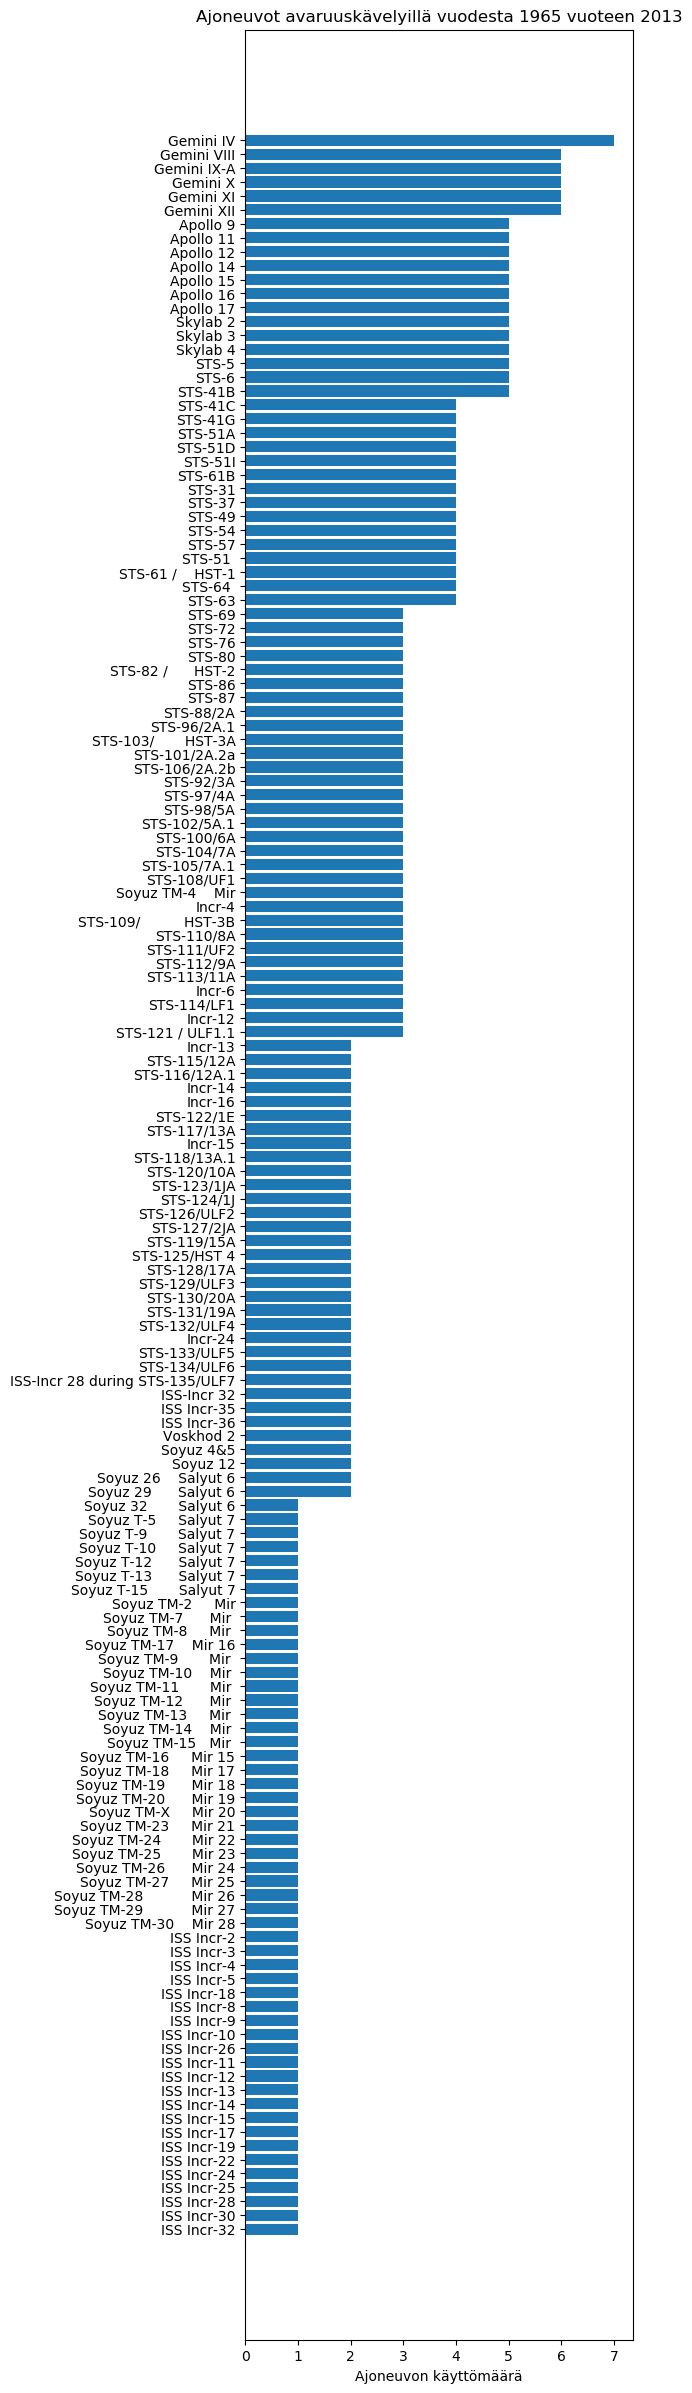

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

newList = Counter(c)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5, 30))


vehi = vehicles
y_pos = np.arange(len(newList))
performance = vAmount

ax.barh(vehi, performance, align='center')
ax.set_yticks(y_pos, vehi)
ax.set_yticklabels(newList)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Ajoneuvon käyttömäärä')
ax.set_title('Ajoneuvot avaruuskävelyillä vuodesta 1965 vuoteen 2013')

#plt.show()
plt.savefig('EVA_vehicles.png')

In [46]:
ids = nasa['EVA #']
print(ids)

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
370    367.0
371    368.0
372    369.0
373    370.0
374    371.0
Name: EVA #, Length: 375, dtype: float64


In [47]:
country = list(nasa.Country)
dates = list(nasa.Date)

dates = [i for i in dates if i is not "NaT"]
dates = [datetime.strptime(ii, "%Y-%m-%d") for ii in dates]

#print(dates)
#print(country)

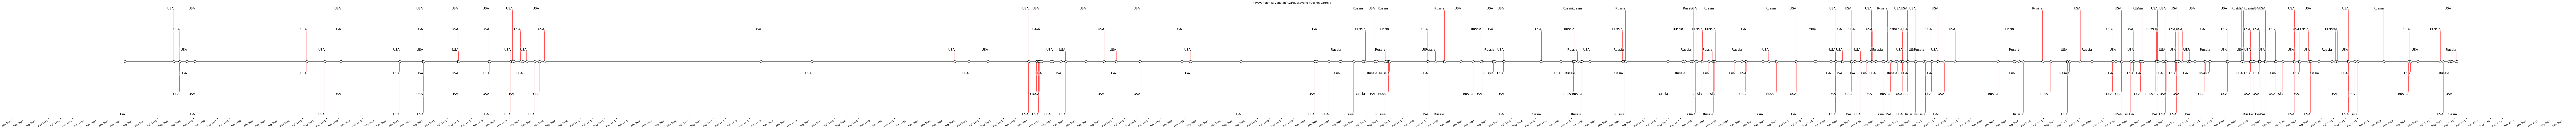

In [48]:
levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(200, 10))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (icountry, idate) in enumerate(zip(country, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, icountry,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Yhdysvaltojen ja Venäjän Avaruuskävelyt vuosien varrella")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
#plt.show()
plt.savefig('EVA_timeline.png')

In [49]:
months2 = []
monthsNamed = []
for i in months:
    months2.append(str(i))
for x in months2:
    months2 = datetime.strptime(x, "%m")
    #monthsName = months2.strftime("%b")
    monthsNamed.append(months2.strftime("%b"))

print("\nMonths: \n", monthsNamed)


Months: 
 ['Jun', 'Jun', 'Jun', 'Jul', 'Jul', 'Sep', 'Sep', 'Nov', 'Nov', 'Nov', 'Mar', 'Mar', 'Jul', 'Jul', 'Nov', 'Nov', 'Nov', 'Feb', 'Feb', 'Feb', 'Jul', 'Jul', 'Aug', 'Aug', 'Aug', 'Aug', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'May', 'May', 'Jun', 'Jun', 'Aug', 'Aug', 'Sep', 'Nov', 'Dec', 'Dec', 'Feb', 'Nov', 'Apr', 'Feb', 'Feb', 'Apr', 'Apr', 'Oct', 'Nov', 'Nov', 'Apr', 'Aug', 'Sep', 'Nov', 'Dec', 'Apr', 'Apr', 'Apr', 'May', 'May', 'May', 'May', 'Jan', 'Jun', 'Sep', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Sep', 'Feb', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'May', 'Dec', 'Dec', 'Dec', 'May', 'Sep', 'Oct', 'Oct', 'Oct', 'Oct', 'Dec', 'Dec', 'Dec', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Apr', 'Apr', 'Jul', 'Jul', 'Jul', 'Aug', 'Aug', 'Dec', 'Dec', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr', 'Apr', 'Apr', 'Jun', 'Jun', 'Jun', 'Oct', 'Oct', 'Oct', 'Nov', 'Nov', 'Nov', 'Jan', '

In [50]:
country = list(nasa.Country)
print(len(years))
print(len(country))
for i in zip(years2, YearsAmount):
    print(i)


years3 = []
for i in YearsAmount:
    years3.append(i)
    
x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table = pd.DataFrame(columns=list('YC'))
table.Y = years2
#table.M = monthsNamed
table.C = years3

#table.reset_index
table.sort_values("Y", inplace = True)
#table["M"] = pd.Categorical(table["M"], table.M.unique())
print(table)

375
375
(1965, 25)
(1966, 24)
(1969, 23)
(1971, 23)
(1972, 19)
(1973, 19)
(1974, 16)
(1978, 15)
(1979, 14)
(1982, 13)
(1983, 13)
(1984, 12)
(1985, 11)
(1986, 10)
(1987, 10)
(1988, 10)
(1990, 10)
(1991, 9)
(1992, 9)
(1993, 9)
(1994, 8)
(1995, 8)
(1996, 7)
(1997, 7)
(1998, 7)
(1999, 7)
(2000, 5)
(2001, 5)
(2002, 5)
(2003, 5)
(2004, 4)
(2005, 2)
(2006, 2)
(2007, 2)
(2008, 2)
(2009, 1)
(2010, 1)
(2011, 1)
(2012, 1)
(2013, 1)
       Y   C
0   1965  25
1   1966  24
2   1969  23
3   1971  23
4   1972  19
5   1973  19
6   1974  16
7   1978  15
8   1979  14
9   1982  13
10  1983  13
11  1984  12
12  1985  11
13  1986  10
14  1987  10
15  1988  10
16  1990  10
17  1991   9
18  1992   9
19  1993   9
20  1994   8
21  1995   8
22  1996   7
23  1997   7
24  1998   7
25  1999   7
26  2000   5
27  2001   5
28  2002   5
29  2003   5
30  2004   4
31  2005   2
32  2006   2
33  2007   2
34  2008   2
35  2009   1
36  2010   1
37  2011   1
38  2012   1
39  2013   1


In [51]:
#country = list(nasa.Country)
print(len(years))
print(len(country))

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table = pd.DataFrame(columns=list('YMC'))
table.Y = years #YearMonth
table.M = monthsNamed
table.C = nasa.Country

#table.reset_index
#table.sort_values("Y", inplace = True)
#table["M"] = pd.Categorical(table["M"], table.M.unique())
print(table)

375
375
        Y    M       C
0    1965  Jun     USA
1    1965  Jun     USA
2    1966  Jun     USA
3    1966  Jul     USA
4    1966  Jul     USA
..    ...  ...     ...
370  2012  Aug  Russia
371  2013  Apr  Russia
372  2013  Jun  Russia
373  2013  Aug  Russia
374  2013  Aug  Russia

[375 rows x 3 columns]


In [52]:
table.index = pd.DatetimeIndex(table.index)
table.head(30)

,Y,M,C
1970-01-01 00:00:00.000000000,1965,Jun,USA
1970-01-01 00:00:00.000000001,1965,Jun,USA
1970-01-01 00:00:00.000000002,1966,Jun,USA
1970-01-01 00:00:00.000000003,1966,Jul,USA
1970-01-01 00:00:00.000000004,1966,Jul,USA
1970-01-01 00:00:00.000000005,1966,Sep,USA
1970-01-01 00:00:00.000000006,1966,Sep,USA
1970-01-01 00:00:00.000000007,1966,Nov,USA
1970-01-01 00:00:00.000000008,1966,Nov,USA
1970-01-01 00:00:00.000000009,1966,Nov,USA


In [53]:
table.set_index(['Y', 'M', 'C']).reset_index()

,Y,M,C
0,1965,Jun,USA
1,1965,Jun,USA
2,1966,Jun,USA
3,1966,Jul,USA
4,1966,Jul,USA
...,...,...,...
370,2012,Aug,Russia
371,2013,Apr,Russia
372,2013,Jun,Russia
373,2013,Aug,Russia


In [54]:
#table.drop_duplicates(subset = "Y",
#                     keep = "first", inplace = True)

table2 = table
#table2['Y'] = range(1, len(table2.index)+1)
table2.set_index(['M'])

idx = pd.MultiIndex.from_arrays([table2['M'], table2['Y']])
#, df_s3['Unit of Measure']
table2 = table2.set_index(idx)
table2.columns.name = None
table2.head(100)
#table6= table5.reset_index()
#table6.head(100)

Y    M    C
M   Y                   
Jun 1965  1965  Jun  USA
    1965  1965  Jun  USA
    1966  1966  Jun  USA
Jul 1966  1966  Jul  USA
    1966  1966  Jul  USA
...        ...  ...  ...
Dec 1999  1999  Dec  USA
    1999  1999  Dec  USA
    1999  1999  Dec  USA
May 2000  2000  May  USA
Sep 2000  2000  Sep  USA

[100 rows x 3 columns]

In [55]:
table = table.replace(['USA', 'Russia'], [10, 5])
table.drop_duplicates(subset = "M",
                     keep = "first", inplace = True)
EVA_matrix = table.pivot("M", "Y", "C")
EVA_matrix

Y,1965,1966,1969,1971,1972,1973,1984,1993
M,,,,,,,,
Apr,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
Aug,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
Dec,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
Feb,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
Jul,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
Jun,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN


In [56]:
EVA_matrix = EVA_matrix.fillna(0)
EVA_matrix

Y,1965,1966,1969,1971,1972,1973,1984,1993
M,,,,,,,,
Apr,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Aug,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
Dec,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Feb,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
Jan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Jul,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
Jun,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
May,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


Text(0.5, 1, 'Avaruuskävelyt vuodesta 1965 vuoteen 2013')

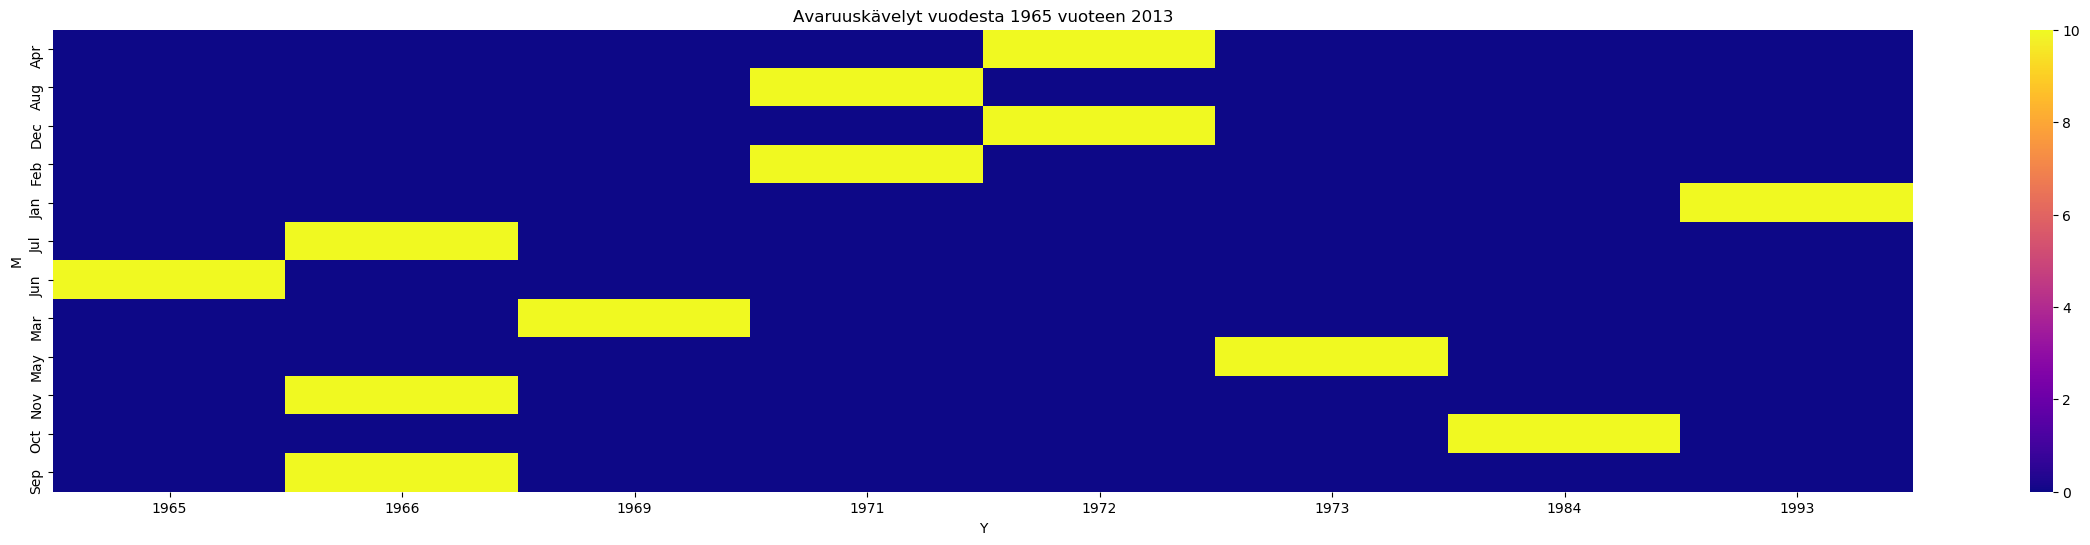

In [57]:
import seaborn as sns

fig = plt.figure(figsize=(30,6))
r = sns.heatmap(EVA_matrix, cmap='plasma')
r.set_title("Avaruuskävelyt vuodesta 1965 vuoteen 2013")